# Introduction

In this tutorial, we will develop a model of semantic knowledge based on the same model from the simulation-based ACT-R [tutorial](http://act-r.psy.cmu.edu/software/). As explained below, the model organizes knowledge into a semantic network in which concepts are represented by nodes and relationships are represented by connections between nodes within the network. 

## Task

In the task, participants must verify whether one category is a member of another category by responding "yes" or "no". For example, a person might recieve a question such as "Is a bird a canary?" and must respond "yes" or "no" with the appropriate keys. 

# Semantic Model

As illustrated in the figure below, category relationships are represented as a semantic network in which nodes correspond to concepts and directed edges correspond to membership. The model can answer questions about category membership directly through a process called direct verification, or indirectly through a process called category chaining. For example, the model can answer the question "Is a bird an animal?" through direct verification by traversing from the bird node to the animal node using a single memory retrieval. By contrast, the question "is a canary an animal?" is answered indirectly through category chaining, which involves traversing from the canary node to the bird node and then from the bird node to the animal node using successive memory retrievals. 

<img src="tutorial_figures/Semantic_Network.png" style="width:400px;height:125px;">


## Declarative Memory

Declarative memory $M$ consists of 20 chunks with the slots, (i.e., domain), $Q = \{\textrm{object, attribute, value}\}$. The object slot refers to the entity being evaluated (e.g. canary); the attribute slot refers to the particular property on which the object is being evaluated (e.g. category, flies); and the value slot refers to the particular value of the attribute (e.g. bird, true). For example, chunk 20 is $c_{20}(\rm{object}) = \textrm{bird}$, $c_{20}(\textrm{attribute}) =\textrm{category}$, $c_{20}(\textrm{value}) = \textrm{animal}$, which indicates that the object bird belongs to the category animal. 


### Activation

Memory activation for chunk $m$ is defined as 

\begin{equation}\label{eq:semantic_activation}
a_m = \textrm{blc} + \rho_m + \epsilon_m
\end{equation}

where $\textrm{blc}$ is the base-level constant and $\rho_m$ is partial matching. We will denote the expected value as $E[a_m] = \mu_m$. The base-level constant simply scales memory activation up or down. Partial matching allows chunks to be retrieved as a function of dissimilarity to the retrieval request values, $\mathbf{r}$. For simplicity, partial matching is defined as a weighted count of mismatching slot-values:

\begin{equation}\label{eq:penalty_function}
\rho_m = -\delta  \sum_{q \in Q_r} I^c\left(r(q),  c_{m}(q)\right)
\end{equation}

where $Q_r = \{\textrm{object},\textrm{attribute}\}$ is the set of slots in the retrieval request, the mismatch penalty parameter $\delta$ controls the steepness of the dissimilarity gradient, and $I^c$ is an indicator function: 

$$ I^c(x,y) =
  \begin{cases}
    1      & x \neq y\\
    0  & x = y
  \end{cases}
$$

In cases where a chunk does not have a slot corresponding to a slot in the retrieval request, we treat it as a mismatch, i.e., $I^c(x, \emptyset)=1.$  Thus, chunks that are more similar to the retrieval request are more likely to be retrieved.

## Markov Process

We will represent the Semantic model as a discrete time Markov process. In a Markov process, a system transitions from state to state, such that the next state depends only on the current state. This constraint on state transitions is known as the Markov property. As is often the case, procedural knowledge is deterministic in the model. We will omit these states, which includes stimulus encoding, to simplify the model, as they do not change the predictions.  Instead, we focus on states that are the product of stochastic declarative memory processes. Thus, the state space for the Semantic model is 

$S = \{s_{\rm ir}, s_{\rm cc1},   s_{\rm cc2},  s_{\rm yes},  s_{\rm no}\}$

The states are defined as follows:
- $s_{\rm ir}$ is the initial retrieval state
- $s_{\rm cc1}$ is the first category chain retrieval state
- $s_{\rm ccs}$ is the second category chain retrieval state
- $s_{\rm yes}$ is the state in which the model responds "yes"
- $s_{\rm no}$ is the state in which model responds "no". 

A convenient way to visualize a Markov process is with a directed graph in which nodes represent states and edges (e.g. arrows) that indicate possible transitions. In the graph below, the process starts at $s_{\rm ir}$ from which point it can transition to states $s_{\rm cc1}$,  $s_{\rm yes}$, or  $s_{\rm no}$. The process terminates when a response is given, Thus, $s_{\rm yes}$, and $s_{\rm no}$ are absorbing states. If the model transitions from $s_{\rm ir}$, to  $s_{\rm cc1}$, it performs second retrieval based on category chaining. From $s_{\rm cc1}$, the model can transition to $s_{\rm yes}$ or $s_{\rm no}$ where a response is made, or to $s_{\rm cc2}$ where a third memory retrieval is performed through category chainining. From $s_{\rm cc2}$, the model can only transition to $s_{\rm yes}$ or $s_{\rm no}$. In principle, there is no limit to the number of category chain states, but for the stimuli consider here, the maximum is two.

<img src="tutorial_figures/Graph.png">


## Retrieval Probability

Although many transitions in the model are deterministic based on the assumption of well-established procedural knowledge, other transitions are stochastic due to noise in declarative memory processes. In those cases, the probability of retrieving chunk $m$ given retrieval request $\mathbf{r}$ is computed from the approximation reported in Weaver (2008):

$\Pr(\mathbf{c}_m; \mathbf{r}) = \frac{e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}},$

where $\sigma = s\sqrt{2}$ controls activation noise and $s$ is the logistic scale parameter. Typically, we are interested in the probability of transitioning into a state rather than the probability of retrieving a particular chunk. Let $R_{s_i, s_j}$ be the set of chunks that would result in a transition from a state $s_i$ to a state, $s_j$. The probability of transitioning  from $s_i$ to $s_j$ is:

$\Pr(s_i\rightarrow s_j; \mathbf{r}) = \frac{ \sum_{m|\mathbf{c}_m \in R_{s_i, s_j}}e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}}.$


## Initial State Vector

After encoding the stimulus into chunk $\mathbf{c}_{s,\textrm{imaginal}}$, the Markov process begins in state $s_{\rm ir}$ with probability 1. Formally, this is represented with the following initial state vector:

<img src="tutorial_figures/Initial_State.png">
                  
Upon entering the state $s_{\rm ir}$, the initial retrieval request $\mathbf{r} =  \{(\rm object, \mathbf{c}_{s, \textrm{imaginal}}(\rm object), (attribute, category)\}$ is issued to declarative memory.

## Transition Matrix

The probabilities of transiting from state to state is organized into a matrix. Let $\mathbf{P}$ be the transition probability matrix, defined as:   

<img src="tutorial_figures/Transition_Matrix.png">

We use $p_{r,c}$ to denote the probability of transitioning from state $r$ to state $c$. Note that $s_{\rm yes}$ and $s_{\rm no}$ are absorbing states, so their self-transitions occur with probability 1 and the probabilities of transitioning to other states are zero.  After encoding the stimulus into  chunk $\mathbf{c}_{s,\rm imaginal}$, the Markov process begins in state $s_{\rm ir}$ with probability 1, where the initial retrieval request $\mathbf{r} =  \{(\rm object, c_{s,\rm imaginal}(\rm object)), (attribute, category)\}$ is issued to declarative memory. Depending on the outcome of the initial retrieval request, the model can transition to state $s_{\rm cc1}$ with probability $p_{1,2}$, state $s_{\rm yes}$ with probability $p_{1,4}$, or state $s_{\rm no}$ with probability $p_{1,5}$. The mapping between the results of the retrieval request and $s_{\rm yes}$ is given by:
\begin{equation}
R_{{\rm ir},{\rm yes}} = \{\mathbf{c}_m \in M: \forall {q\in Q}, p_{j}(q) = c_m(q) \},
\label{eq:map_yes}
\end{equation}
where $\mathbf{p}_j = \{(\rm object, c_{s,\rm imaginal}(\rm object)),  (\rm attribute, category),(value, c_{s,\rm imaginal}(category))\}$. $R_{{\rm ir},{\rm yes}}$ contains a single chunk because $\mathbf{p}_j$ requires an exact match. The mapping between the result of the retrieval request and a category chain state is given by: 
\begin{equation}
R_{{\rm ir},{\rm cci}} = \{\mathbf{c}_m  \in M: \forall {q\in Q}, p_k(q) = c_m(q) \},
\label{eq:map_cc}
\end{equation}
where $\mathbf{p}_k = \{(\rm object, c_{s,\rm imaginal}(\rm object)), (\rm attribute, category), (\rm value, \neg c_{s,\rm imaginal}(\rm category)\}$ denotes the conditions for production rule $k$.  The mapping between the result of the retrieval request and $s_{\rm no}$ is given by:
\begin{equation}
R_{{\rm ir},{\rm no}} = \{\mathbf{c}_m  \in M: \exists {q \in Q_{j}} \textrm{ s.t. } p_j(q) \neq c_m(q)\} \cup \mathbf{c}_{m^\prime},
\label{eq:map_no}
\end{equation}
where $Q_{j} = \{\rm object, attribute\}$. If the model transitions into absorbing states $s_{\rm yes}$ or $s_{\rm no}$, a response is emitted and the model terminates. However, if the model transitions to state $s_{\rm cc1}$, a new retrieval request $\mathbf{r}_{\rm cc1}$ is formed by assigning the value of the value slot of retrieved chunk $\mathbf{c}_{r1} \in R_{{\rm ir}, {\rm cc1}}$, which we denote $c_{r1}({\rm value})$, to the value of the object slot in the new retrieval request: $\mathbf{r}_{\rm cc1} = \{\rm (object, c_{r1}(value)), (attribute, category)\}$. 
 In addition, $\mathbf{c}_{s, \rm imaginal}$ is modified after each category chain $i \in \{1,2\}$ as follows: $c_{s,\rm imaginal}(\rm object) = c_{ri}(value)$.
 
 For some stimuli considered here it is possible to transition to $s_{\rm cc2}$ where a second category chain is performed.  The mapping between the results of retrieval request $\mathbf{r}_{cc1}$ and state $s_{\rm cc2}$ is $R_{\rm cc1,cc2}$. In state $s_{\rm cc2}$, a new retrieval retrieval request $\mathbf{r}_{cc2} = \{\rm (object, c_{r2}), (attribute,category) \}$ is formed from retrieved chunk $c_{r2} \in R_{\rm cc1,cc2}$.  

### A worked example 

As a concrete example, consider the question for canary-animal in which the model arrives at the correct answer "yes" through the process of category chaining. The model encodes the stimulus into chunk $\mathbf{c}_{s,\rm imaginal} = \{\rm (object, canary), (category, animal)\}$ before issuing retrieval request $\mathbf{r} = \{(\textrm{object},\textrm{canary}), (\textrm{attribute},\textrm{category})\}$. Let $\mathbf{p}_{j} = \{(\textrm{object},\textrm{canary}), (\textrm{attribute},\textrm{category}), (\textrm{value},  \textrm{animal})\}$ be the conditions for the "yes" production rule, and $\mathbf{p}_{k} = \{(\textrm{object},\textrm{canary}), (\textrm{attribute},\textrm{category}), (\textrm{value}, \lnot \textrm{animal})\}$ be the conditions for the category chaining production rule.  Using the mappings defined above, the probability of transitioning from the initial retrieval state, $s_{\rm ir},$ to the first category chain retrieval state, $s_{\rm cc1},$ is given by,
$p_{1,2} = \frac{\sum_{m|\mathbf{c}_m  \in R_{\rm ir, cc1}} e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}}.$    

The probability of transitioning from the initial retrieval state, $s_{\rm ir}$, to a no response, $s_{\rm no},$ is given by,

$p_{1,5} = \frac{\sum_{m|\mathbf{c}_m  \in R_{\rm ir,no}} e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}}.$

The model cannot transition from $s_{\rm ir}$ to $s_{\rm yes}$ to verify that a canary is an animal upon the first retrieval because $R_{\rm ir,yes} = \emptyset$ at this point in the process. Thus, $p_{1,4} = 0$, which implies $p_{1,5} = 1 - p_{1,2}$. 

Let us assume that the model transitions from $s_{\rm ir}$ to  $s_{\rm cc1}$ by retrieving $\mathbf{c}_{r1} = \{(\rm object, canary),(\rm attribute, category), (\rm value, bird)\}$.  A new retrieval request $\mathbf{r}_{\rm cc1} = \{(\rm object, bird),(\rm attribute, category) \}$ is used to perform a retrieval for category chaining and the chunk in the imaginal buffer becomes  $\mathbf{c}_{s,\rm imaginal} = \{\rm (object, bird), (category, animal)\}$. From $s_{\rm cc1}$, the model can transition to $s_{\rm cc2}$ with probability $p_{2,3}$, to $s_{\rm yes}$ with probability $p_{2,4}$, or to $s_{\rm no}$ with probability $p_{2,5}$ depending on the result of the retrieval request $\mathbf{r}_{cc1}$. The probability of $p_{2,3} = 0$ because $R_{\rm cc1,cc2} = \emptyset$, i.e., there are no chunks in memory for which a bird is not an animal. The probability of transitioning to $s_{\rm yes}$ is,

$p_{2,4} = \frac{\sum_{m|\mathbf{c}_m \in R_{\rm cc1,yes}} e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}},$

which is obtained by retrieving $\mathbf{c}_{r2} = \{(\rm object, bird), (\rm attribute, category), (\rm value, animal)\}$. The complementary probability of transitioning to $s_{\rm no}$ is obtained by:

$p_{2,5} = \frac{\sum_{m|\mathbf{c}_m \in R_{\rm cc1, no}} e^{\mu_m/\sigma}}{\sum_{k|\mathbf{c}_k \in M} e^{\mu_k/\sigma} + e^{\mu_{m^\prime}/\sigma}} = 1-p_{2,4}$

#### Generating the Transition Matrix

In the code block below, we will generate the transition matrix for the question "Is a canary an animal?". Before doing so, we will first load the required dependencies.

In [1]:
cd(@__DIR__)
using Pkg
Pkg.activate("../../")
using StatsPlots, ACTRModels, Distributions, Turing, NamedArrays
include("Semantic_Model.jl")
Random.seed!(354301);

  Activating environment at `~/.julia/dev/ACTRFundamentalTools/Project.toml`


In the following example, the transition matrix is generated with the function `transition_matrix`. We begin by defining the `stimulus` and the model parameters in `parm`. Next we create an ACT-R model object and pass it to to `transition_matrix`. Lastly, we add labels to the transition matrix with `NamedArray`.

In [2]:
blc = 1.0
parms = (noise = true, τ = 0.0, s = 0.2, mmp = true, δ = 1.0)
stimulus = (object = :canary, category = :animal, ans = :yes)
# populate declarative memory
chunks = populate_memory()
# create declarative memory object
memory = Declarative(;memory=chunks)
# create act-r object
actr = ACTR(;declarative=memory, parms..., blc)
# generate transition matrix
tmat = transition_matrix(actr, stimulus, blc)
# states: initial retrieval, category chain 1, category chain 2, respond yes and respond no
states = ["Sir", "Scc1", "Scc2", "Syes", "Sno"]
# name the rows and columns
NamedArray(tmat, (states, states), ("t","t+1")) |> x->round.(x, digits=2)

5×5 Named Matrix{Float64}
t ╲ t+1 │  Sir  Scc1  Scc2  Syes   Sno
────────┼─────────────────────────────
Sir     │  0.0   0.8   0.0   0.0   0.2
Scc1    │  0.0   0.0   0.0   0.8   0.2
Scc2    │  0.0   0.0   1.0   0.0   0.0
Syes    │  0.0   0.0   0.0   1.0   0.0
Sno     │  0.0   0.0   0.0   0.0   1.0

#### Response Probabilities

Based on the transition matrix above, there is one path to a "yes" response and two paths to a "no" response. The probability of responding yes is 

$\rm Pr(\rm Response = yes) = p_{1,2}\times p_{2,4} = .80 \times .80 = .64$

The probability of responding "no" is 

$\rm Pr(\rm Response = no) = \underbrace{p_{1,5}}_{\textrm{ no on initial retrieval}} + \underbrace{p_{1,2}\times p_{2,5}}_{\textrm{no on category chain}} = .20 + .80 \times .20 = .36$

As expected, $\rm Pr(\rm Response = no) = 1 - \rm Pr(\rm Response = yes)$.

# Generate Data

The data generation process uses four primary functions, shown below. Each function is annotated.  The function `simulate` is the top-level function that initializes the data generation process. It accepts the following inputs

- parms: a `NamedTuple` of fixed parameters
- stimulus: a `NamedTuple` of stimulus slot-value pairs
- n_reps: the number of trials or repetitions for a given stimulus
- blc: keyword argument for the base-level constant parameter.

`simulate` performs two primary functions. First, it initializes the ACT-R model with the desired parameters. Second, it iterates through simulated trials with the same stimulus and counts the number of correct responses `k`. `simulate` returns a `NamedTuple` containing the stimulus, the number of simulated trials, and the number of correct responses. 

Inside the for loop of `simulate`, the function `simulate_trial` generates data for a single simulated trial. `simulate_trial` requires two inputs:

- `actr`: an ACT-R model object
- `stimulus`: a stimulus containing values for object and category

`simulate_trial` performs chained retrievals until a yes or no state is researched in the markov process. On each iteration of the while loop the model performs the following actions:

1. retrieve a chunk
2. evaluate whether to respond yes, respond no, or to chain the category in a subsequent memory retrieval

If the a retrieval failure occurs, `k` remains zero indicating a no response, `retrieving` is set to false and the simulation terminates for the present trial. If  the function `direct_verify` returns true, the model responds "yes". `direct_verify` corresponds to production rule $p_j$ described above. In this case, `k` = 1 and `retrieving` is set to false to terminate the simulation. If `chain_category` returns true, the model chains the category and attempts an additional memory retrieval by seting the object slot of the probe to the value of the object slot in the retrieved chunk. The remaining condition is that a mismatching chunk was retrieved, in which case `retrieving` is set to false, and `k` remains zero, indicating a "no" response. 

In [3]:
function simulate(parms, stimulus, n_reps; blc)
    # populate declarative memory
    chunks = populate_memory()
    # generate declarative memory object
    memory = Declarative(;memory=chunks)
    # generate ACTR object
    actr = ACTR(;declarative=memory, parms..., blc)
    # the number of correct responses
    k = 0
    # count the number of correct answers, k
    for rep in 1:n_reps
        k += simulate_trial(actr, stimulus)
    end
    # return data that constains stimulus information, number of trials, 
    # and correct answers
    return (stimulus..., N = n_reps, k = k)
end

function simulate_trial(actr, stimulus)
    retrieving = true
    # create memory probe or retrieval request
    probe = stimulus
    chunks = actr.declarative.memory
    # k = 1 if answer is "yes", 0 otherwise
    k = 0
    while retrieving
        # generate retrieval probabilities
        p,_ = retrieval_probs(actr; object=probe.object, attribute=:category)
        # sample a chunk index proportional to retrieval probabilities
        idx = sample(1:length(p), weights(p))
        # Last element corresponds to a retrieval failure
        # stop retrieval processes
        if idx == length(p)
            retrieving = false
        # retrieved chunk matches retrieval request, stop retrieving
        # and set k = 1 for "yes" response
        elseif direct_verify(chunks[idx], probe)
            retrieving = false
            k += 1
        # perform another retrieval with category chaining
        # modify the retrieval request based on the retrieved chunk
        elseif chain_category(chunks[idx], probe)
            probe = delete(probe, :object)
            probe = (object = chunks[idx].slots.value, probe...)
        # no chunks match, stop retrieving and respond "no" with k = 0
        else
            retrieving = false
        end
    end
    return k
end

"""
Answer yes via direct verification if retrieved chunk matches
probe on the object slot, the attribute slot equals category and the 
value slot matches the value of the probe's category slot
"""
function direct_verify(chunk, probe)
    return match(chunk, object=probe.object,
        value=probe.category, attribute=:category)
end

"""
Chain category if retrieved chunk matches
probe on the object slot, the attribute slot equals category and the 
value slot does not match the value of the probe's category slot
"""
function chain_category(chunk, probe)
    return match(chunk, ==, !=, ==, object=probe.object,
        value=probe.category, attribute=:category)
end

chain_category

We will use the questions "Is a canary a bird" and "Is a canary an animal" as the stimuli for the simulation. In the code below, 10 trials are generated for each question. The data are formated as an array of `NamedTuples` where

- object: is the object slot

- category: the category slot

- ans: the correct answer

- N: the number of trials

- k: the number of trials in which yes is given as a response

In [4]:
# true blc value
blc = 1.0
# fixed parameters
parms = (noise = true, τ = 0.0, s = .2, mmp = true, δ = 1.0)
stimuli = get_stimuli()
n_reps = 10
data = map(x -> simulate(parms, x, n_reps; blc), stimuli)

2-element Vector{NamedTuple{(:object, :category, :ans, :N, :k), Tuple{Symbol, Symbol, Symbol, Int64, Int64}}}:
 (object = :canary, category = :bird, ans = :yes, N = 10, k = 8)
 (object = :canary, category = :animal, ans = :yes, N = 10, k = 7)

## Define Likelihood Function

The probability of responding "Yes" is obtained from the stationary distribution vector, $\boldsymbol{\pi} \in \mathbb{R}^{1XN}$. The stationary distribution vector describes the limiting behavior of the Markov process, such that $\boldsymbol{\pi} = \lim_{n \to \infty}  \mathbf{s} \mathbf{P}^n$ and $\boldsymbol{\pi} = \boldsymbol{\pi}{P}$. The probability of responding "Yes" is given by $\theta = \pi_4$. The likelihood of responding "Yes" on $k$ trials out of a total of $n_t$ trials is given by the binomial likelihood function:

$\mathcal{L}(\theta ; k, n_t) = {n_t \choose k} \theta^k (1-\theta)^{n_t-k} $


The annotated code below impliments the likelihood function defined mathematically above. The function `computeLL` is the top-level function that computes the log likelihood across all data. The function `initial_state` generates the initial state vector. `transition_matrix` generates the transition matrix and the function `probability_yes` computes the log likelihood of $k$ "yes" responses out of $N$ trials using the binomial log PDF function. The most complex part of the code is the function `transition_matrix`. At a high level, the code matches the formal discription above, which involves the following steps

1. compute a vector p that represents the retrieval probability of each chunk
2. define the mapping between states by dividing chunk indices into sets that correspond to direct verification (yes response), category chain, and mismatching chunks (no response)
3. request chunk that matches category chain production rule
4. modify probe/retrieval request for the next category chain
5. continue steps 1-4 while there is a chunk that matches the category chain production rule


In [5]:
using Parameters, StatsBase, NamedTupleTools

import Distributions: logpdf, loglikelihood

struct Semantic{T1,T2} <: ContinuousUnivariateDistribution
    blc::T1
    parms::T2
end

loglikelihood(d::Semantic, data::Array{<:NamedTuple,1}) = logpdf(d, data)

Semantic(;blc, parms) = Semantic(blc, parms)

function initial_state(blc)
    s0 = zeros(typeof(blc), 5)
    s0[1] = 1
    return s0
end

function computeLL(parms, data; blc)
    act = zero(typeof(blc))
    # populate declarative memory
    chunks = populate_memory(act)
    # create declarative memory object
    memory = Declarative(;memory=chunks)
    # create act-r object
    actr = ACTR(;declarative=memory, parms..., blc)
    # create initial state vector
    s0 = initial_state(blc)
    LL = 0.0
    for d in data
        # create transition matrix
        tmat = transition_matrix(actr, d, blc)
        # compute probability of "yes"
        LL += probability_yes(tmat, s0, d)
    end
    return LL
end

function probability_yes(tmat, s0, d)
    z = s0' * tmat^3; θ = z[4]
    # sometimes θ is nan because of exponentiation of activation
    return isnan(θ) ? (return -Inf) : logpdf(Binomial(d.N, θ), d.k)
end

"""
populatates transition matrix consisting of 5 states:
* `s1`: initial retrieval
* `s2 `: chain category 1
* `s3`: chain category 2
* `s4`: respond yes
* `s5`: respond no
"""
function transition_matrix(actr, stim, blc)
    chunks = actr.declarative.memory
    Nc = length(chunks) + 1
    probe::typeof(stim) = stim
    probe = stim
    N = 5
    # populate transition matrix
    tmat = zeros(typeof(blc), N, N)
    # compute retrieval probabilities, p
    p,_ = retrieval_probs(actr; object=get_object(probe), attribute=:category)
    # find indices of chunks associated with direct verification, category chaining and mismatching conditions
    direct_indices = find_indices(actr, object=get_object(probe), value=get_category(probe))
    chain_indices = find_indices(actr, ==, !=, ==, object=get_object(probe), value=get_category(probe), attribute=:category)
    mismatch_indices = setdiff(1:Nc, direct_indices, chain_indices)
    # use indices to compute probability of category chain, direct verification (yes), and mismatch (no)
    tmat[1,2] = sum(p[chain_indices])
    tmat[1,4] = sum(p[direct_indices])
    tmat[1,5] = sum(p[mismatch_indices])
    # attempt to extract chunk associated with category chaining
    chain_chunk = get_chunks(actr,==,!=,==, object = get_object(probe),
    value = get_category(probe), attribute=:category)
    cnt = 1
    # continue the process above as long as category chaining can be performed.
    while !isempty(chain_chunk)
        cnt += 1
        probe = (object = get_chunk_value(chain_chunk[1]), delete(probe, :object)...)
        p,_ = retrieval_probs(actr; object=get_object(probe), attribute=:category)
        direct_indices = find_indices(actr, object=get_object(probe), value=get_category(probe))
        chain_indices = find_indices(actr, ==, !=, ==, object=get_object(probe), value=get_category(probe), attribute=:category)
        mismatch_indices = setdiff(1:Nc, direct_indices, chain_indices)
        tmat[cnt,2] = sum(p[chain_indices])
        tmat[cnt,4] = sum(p[direct_indices])
        tmat[cnt,5] = sum(p[mismatch_indices])
        chain_chunk = get_chunks(actr,==,!=,==, object = get_object(probe),
        value = get_category(probe), attribute=:category)
    end
    # set self-transitions to 1 if row i sums to 0.0
    map(i -> sum(tmat[i,:]) == 0.0 ? (tmat[i,i] = 1.0) : nothing, 1:size(tmat, 2))
    return tmat
end

transition_matrix

## Define Model

The prior distributions and model is summarized as follows:

\begin{align}
\rm blc \sim Normal(1,1)
\end{align}

\begin{align}
\theta = \mathbf{\pi_4}
\end{align}

\begin{align}
k \sim \rm Binomial(\theta, N)
\end{align}

where $ \mathbf{\pi}$ is the stationary distribution and index 4 corresponds to state $s_{\rm yes}$. In computer code, the model is specified as follows:

In [6]:
@model model(data, parms) = begin
    blc ~ Normal(1.0, 1.0)
    data ~ Semantic(blc, parms)
end

model (generic function with 1 method)

## Estimate Parameters

Now that the priors, likelihood and Turing model have been specified, we can now estimate the parameters. In the following code, we will run four MCMC chains with the NUTS sample for 2,000 iterations and omit the first 1,000 warmup samples. 

In [7]:
# Settings of the NUTS sampler.
n_samples = 1500
n_adapt = 1500
specs = NUTS(n_adapt, 0.65)
n_chains = 4
chain = sample(model(data, parms), specs, MCMCThreads(), n_samples, n_chains, progress=true)

┌ Info: Found initial step size
│   ϵ = 0.41250000000000003
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/dfish/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC /home/dfish/.julia/packages/AdvancedHMC/yd6UP/src/hamiltonian.jl:47
┌ Warning: The current

Chains MCMC chain (1500×13×4 Array{Float64, 3}):

Iterations        = 1501:1:3000
Number of chains  = 4
Samples per chain = 1500
Wall duration     = 13.72 seconds
Compute duration  = 52.29 seconds
parameters        = blc
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

         blc    1.5328    0.7085     0.0091    0.0204   1166.2415    1.0023    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

         blc    0.4439    0.9933    1.4321    1.9695    3.1418


## Results

In the summary output above, rhat is very close to 1, indicating convergence of the MCMC chains.The trace plot below also shows good mixing: the trace of each chain fluctuates randomly, and the traces are plotted on top of each other.  

The autocorrelation plot in the second pannel shows low autocorrelation, indicating efficient sampling of the posterior distribution. In the third panel, the density plot shows that the posterior distribution of blc encompasses the data generating value of blc = 1 and is highly skewed.

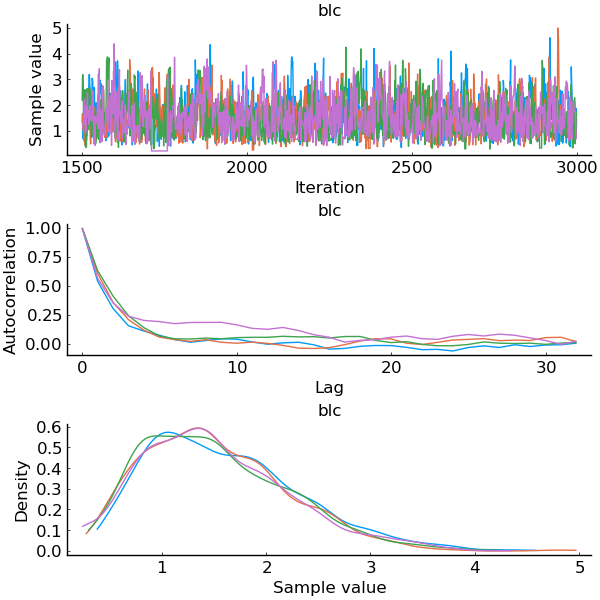

In [8]:
pyplot()
ch = group(chain, :blc)
font_size = 12
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

### Posterior Predictive Distribution

The plots below show the posterior predictive distributions for percent correct for the question "is a canary a bird", which requires no category chains and the question "is a canary an animal?", which requires 1 category chain. Comparing the distributions, we see that, on average, category chaining reduces accuracy. The reduction in accuracy can be attributed to the increase in opportunities to incorrectly respond "no": one opportunity following the initial retrieval and a second opportunity following the category chain retrieval.

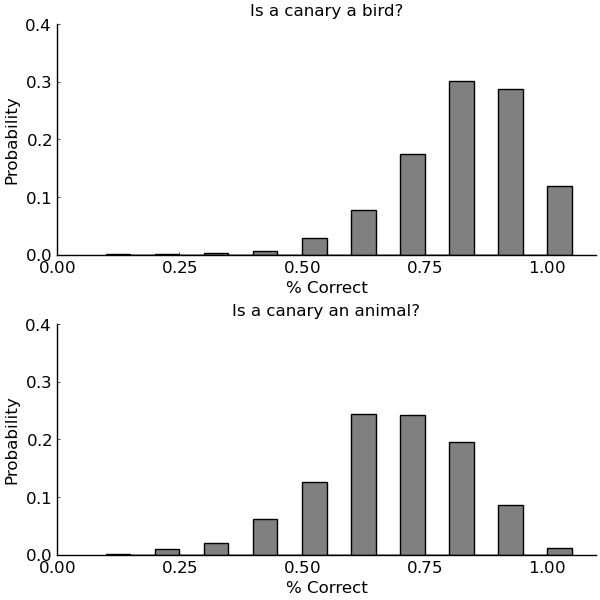

In [9]:
font_size = 12
hit_rates(s) = posterior_predictive(x -> hit_rate(parms, s, n_reps; x...), chain, 1000)
preds = map(s -> hit_rates(s), stimuli)
predictive_plot = histogram(preds, xlabel="% Correct" ,ylabel="Probability", xaxis=font(font_size), yaxis=font(font_size),
    grid=false, color=:grey, leg=false, titlefont=font(font_size), xlims=(0,1.1),
    layout=(2,1), ylims=(0,0.4), normalize=:probability, size=(600,600), title=["Is a canary a bird?" "Is a canary an animal?"])

# References

Weaver, R. (2008). Parameters, predictions, and evidence in computational modeling: A statistical view informed by ACT–R. Cognitive Science, 32(8), 1349-1375.